In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from functions import read_and_clean, concat_same_city

In [3]:
# declare variables
cities = ['sydney', 'melbourne', 'brisbane']
years = ['2019', '2020', '2021', '2022']
columns_to_vis = ['WC', 'Analytic', 'cogproc', 'emo_pos', 'emo_anx', 'emo_anger', 'emo_sad', 'family', 'friend']

In [4]:
dataframes_to_vis = read_and_clean()

/Users/ivanosipchyk/dev/studies/reddits-visualization/src/visualization/functions.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + city.capitalize() + '/' + city + '_' + year + '.csv')
/Users/ivanosipchyk/dev/studies/reddits-visualization/src/visualization/functions.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + city.capitalize() + '/' + city + '_' + year + '.csv')
/Users/ivanosipchyk/dev/studies/reddits-visualization/src/visualization/functions.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + city.capitalize() + '/' + city + '_' + year + '.csv')
/Users/ivanosipchyk/dev/studies/reddits-visualization/src/visualization/functions.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df

In [5]:
df = dataframes_to_vis['sydney']
print(df.shape)
df = df[df['WC'] >= 15]
print(df.shape)

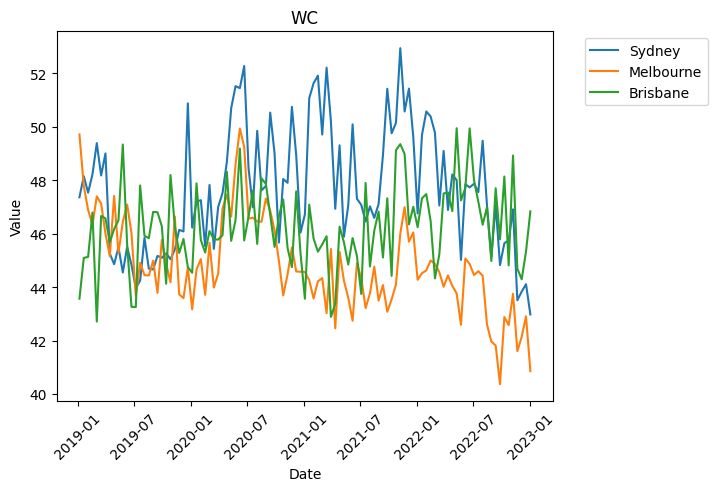

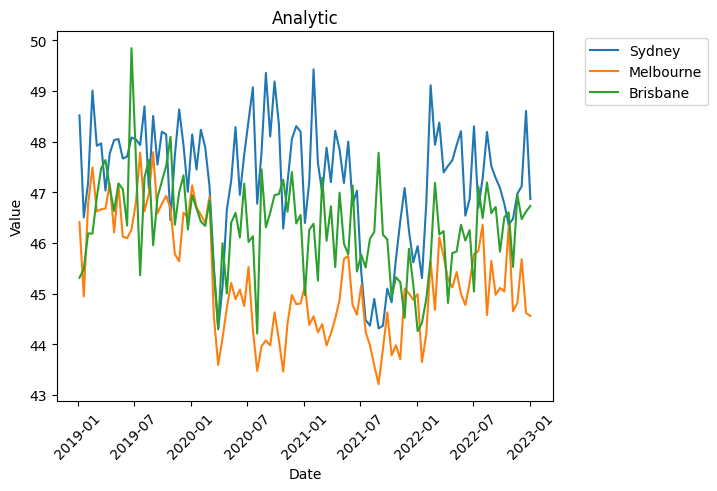

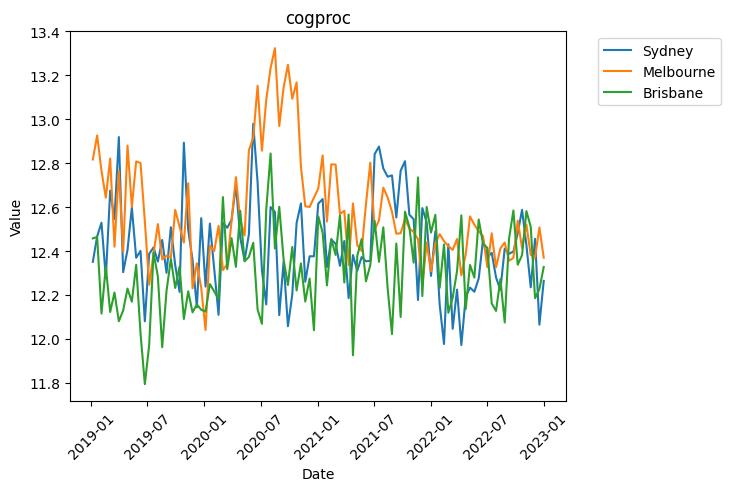

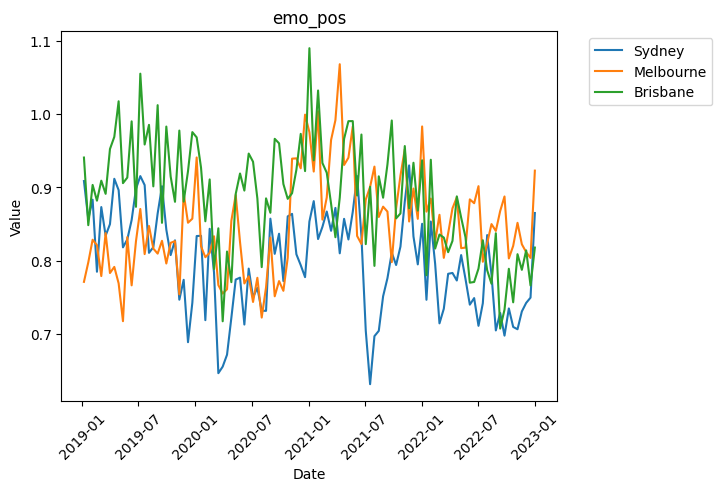

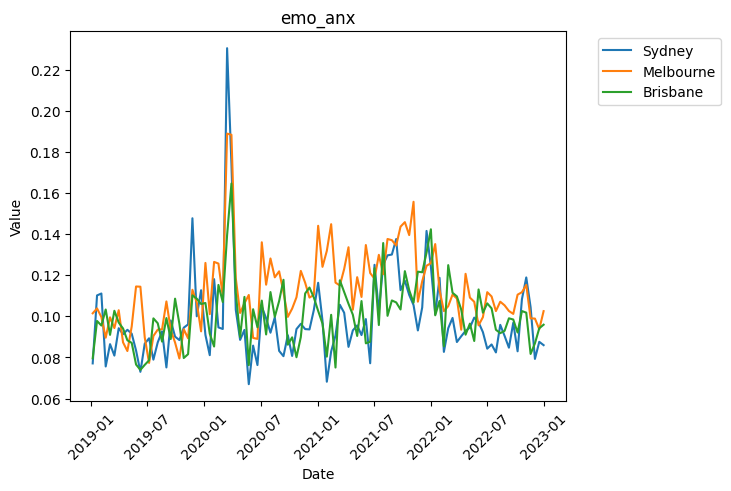

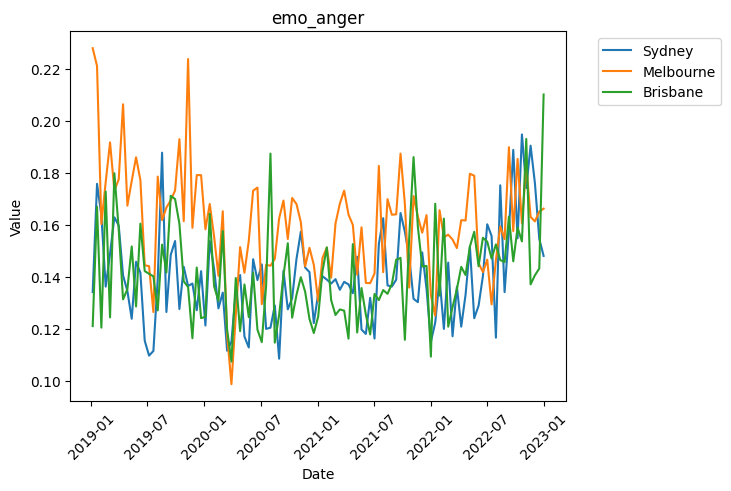

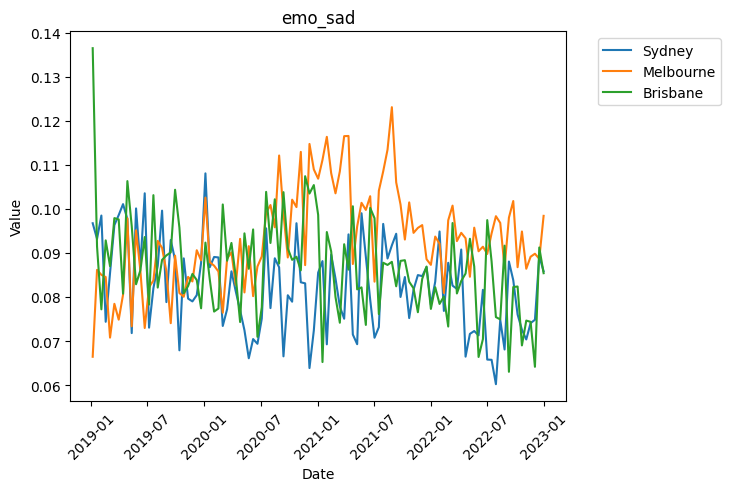

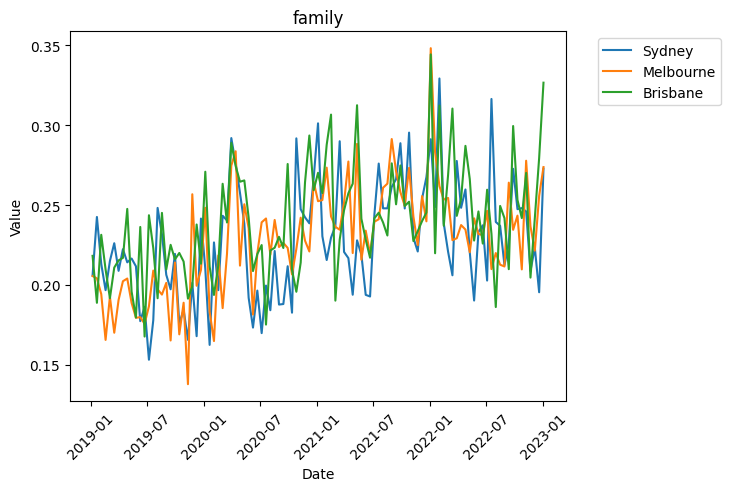

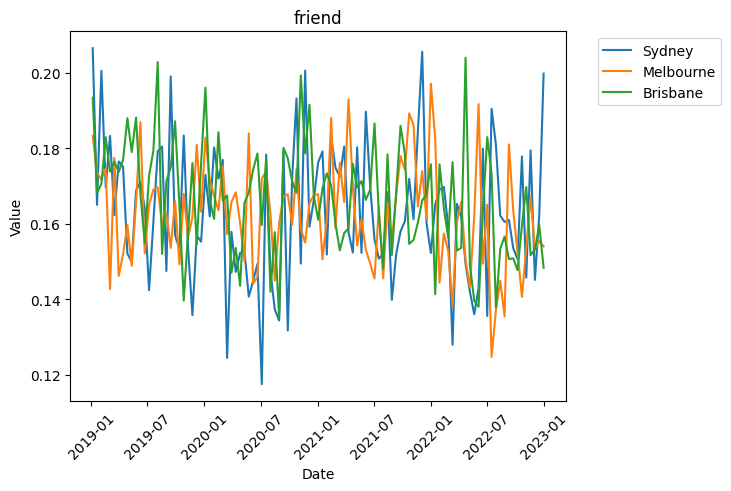

In [6]:
def visualize(dataframes_vis, agg_period):
    dataframes_concatenated = concat_same_city(dataframes_vis)

    dataframes_grouped = {}

    for key, value in dataframes_concatenated.items():
        df = value.resample(agg_period).mean()
        dataframes_grouped[key] = df

    for column in dataframes_grouped['sydney'].columns:
        fig, ax = plt.subplots()

        for key, value in dataframes_grouped.items():
            ax.plot(value[column], linestyle='solid')

        # set the title and axis labels
        ax.set_title(f'{column}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        # create a legend for the graph
        ax.legend(['Sydney', 'Melbourne', 'Brisbane'], bbox_to_anchor=(1.05, 1), loc='upper left')
        # display the plot
        plt.xticks(rotation=45)
        plt.show()

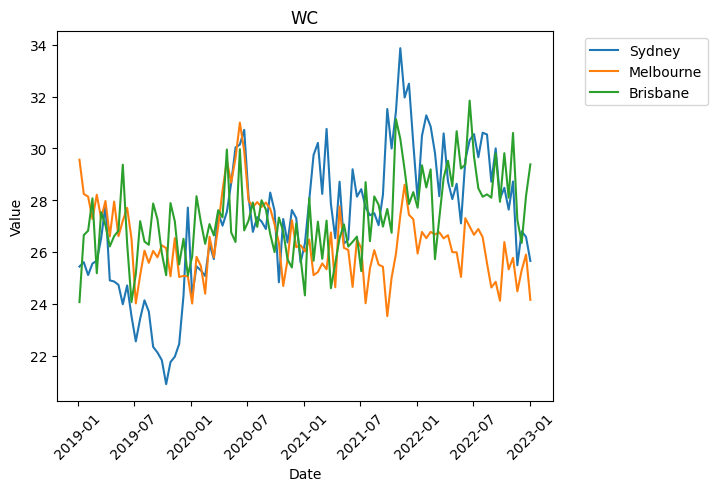

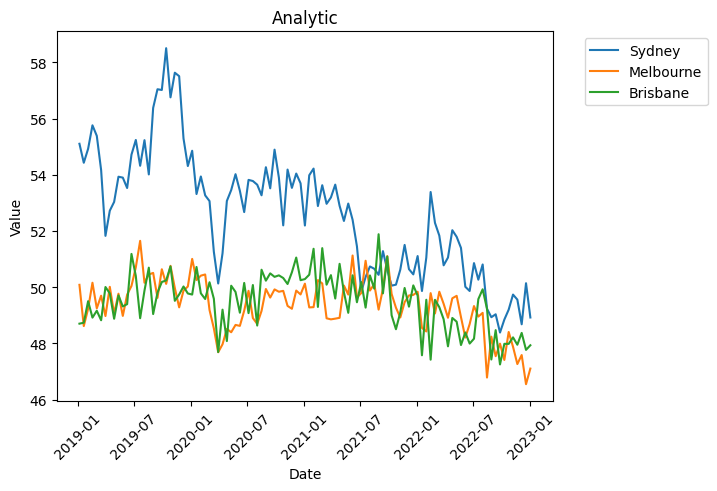

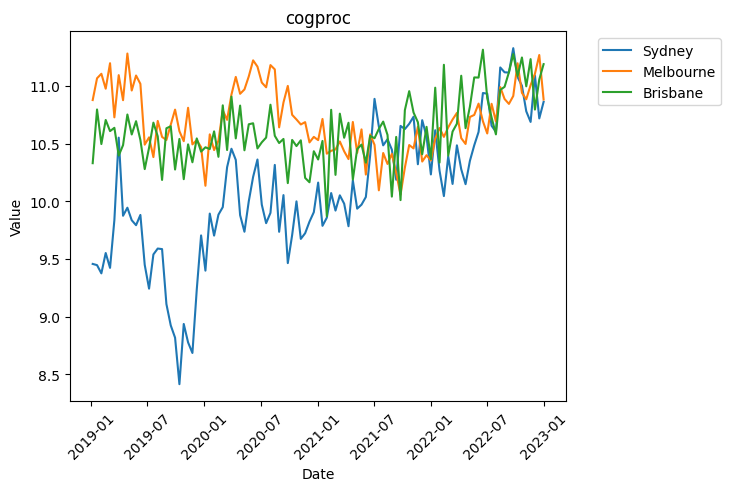

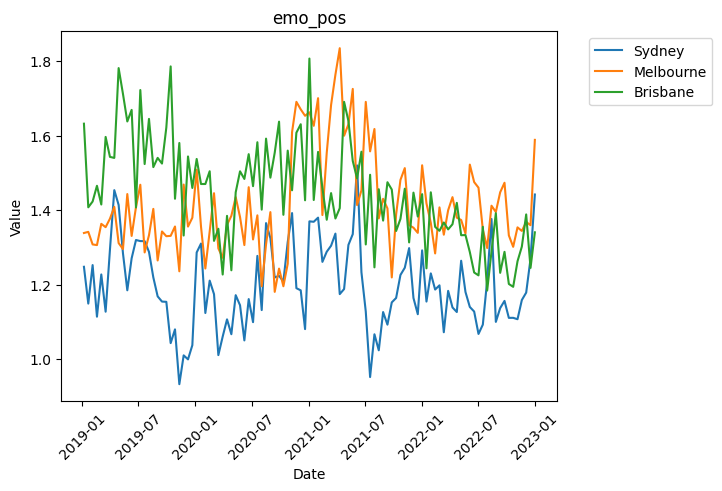

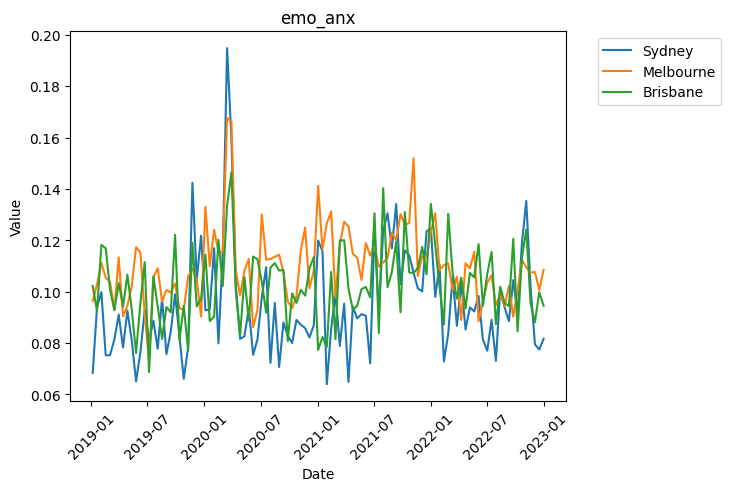

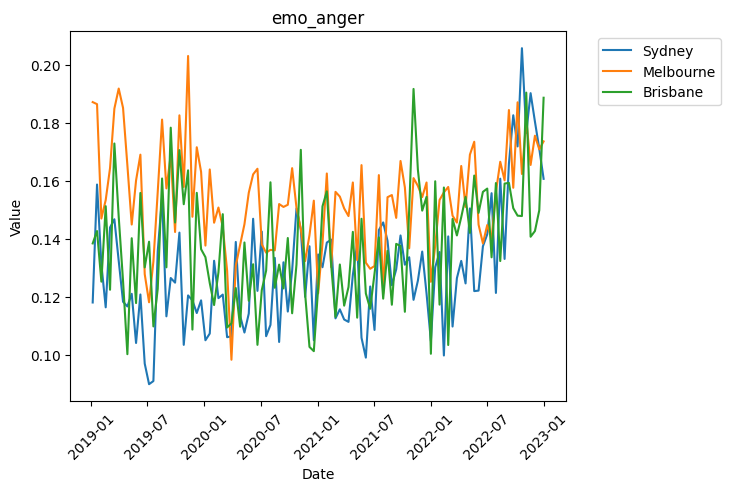

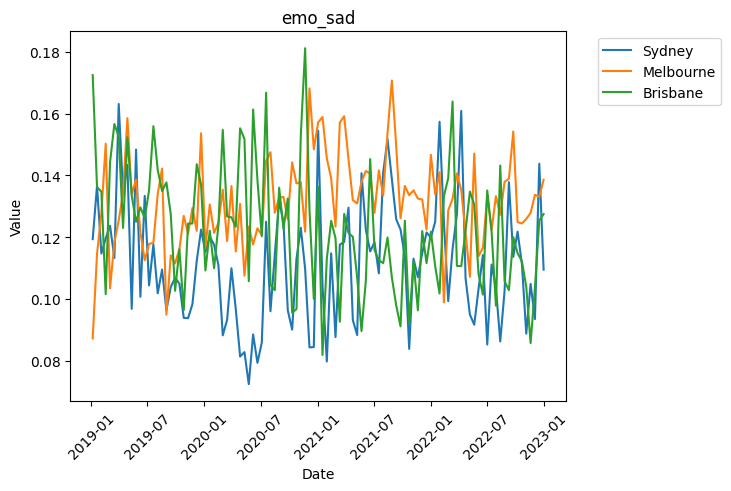

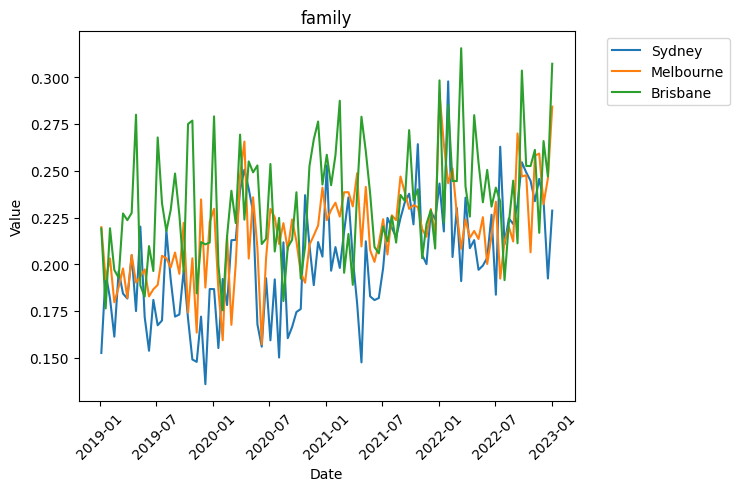

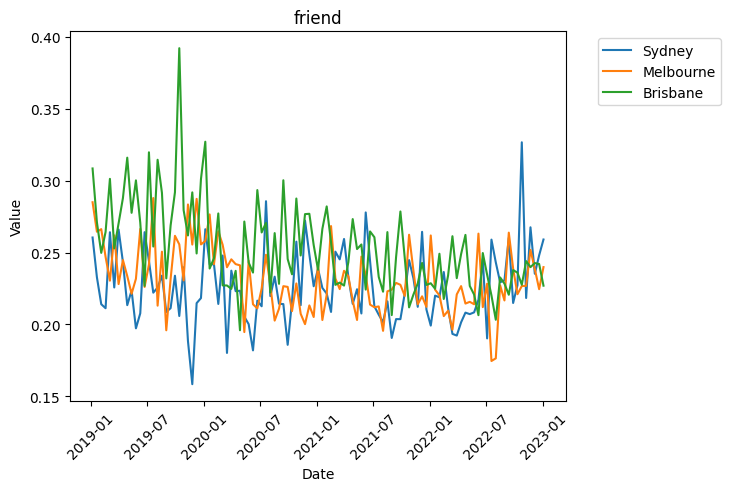

In [5]:
visualize(dataframes_to_vis, '2W')